# 1. Exploratory Data Analysis

**Importing modules and getting the data**

In [1]:
# Core modules
import numpy as np
import pandas as pd

# Basic modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data into a pandas DataFrame from given filepath
housing = pd.read_csv('train.csv')

**Understand the Data Structure**

In [3]:
# Get columns names of the dataframe
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Get shape of data
housing.shape

(1460, 81)

In [5]:
# Top 5 rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# the columns Id is not useful as an attribute so we can drop it
housing = housing.drop("Id", axis = 1)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Numerical Atributes**

In [9]:
# List of numerical attributes
housing.select_dtypes(exclude = ['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
# Get the data summary with upto 2 decimals and call transpose() for better vies of the results

housing.select_dtypes(exclude = ['object']).describe().round(decimals = 2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


In [11]:
housing.describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


**Categorical attributes**

In [12]:
# Get the categorical attributes
housing.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Get the summary of categorical attributes
housing.select_dtypes(include = ['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [14]:
housing["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [15]:
len(housing["Neighborhood"].value_counts())

25

# Explore Numerical Attributes

**Looking at data distributions**

In [16]:
# Descriptive statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

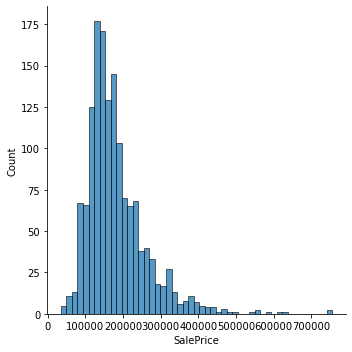

In [17]:
# Get the distibution plot
sns.displot(housing['SalePrice']);
#sns.despine()

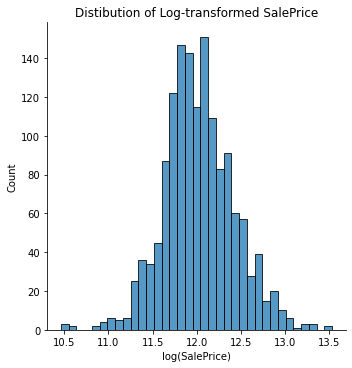

In [18]:
# Take the log to make the distibution more normal
sns.displot(np.log(housing['SalePrice']));
plt.title('Distibution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [19]:
# What about the distibution of all the other numerical variables???
num_attributes = housing.select_dtypes(exclude = ['object']).drop(['SalePrice'], axis = 1).copy()

36


/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jele

/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/jelena/miniconda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and wil

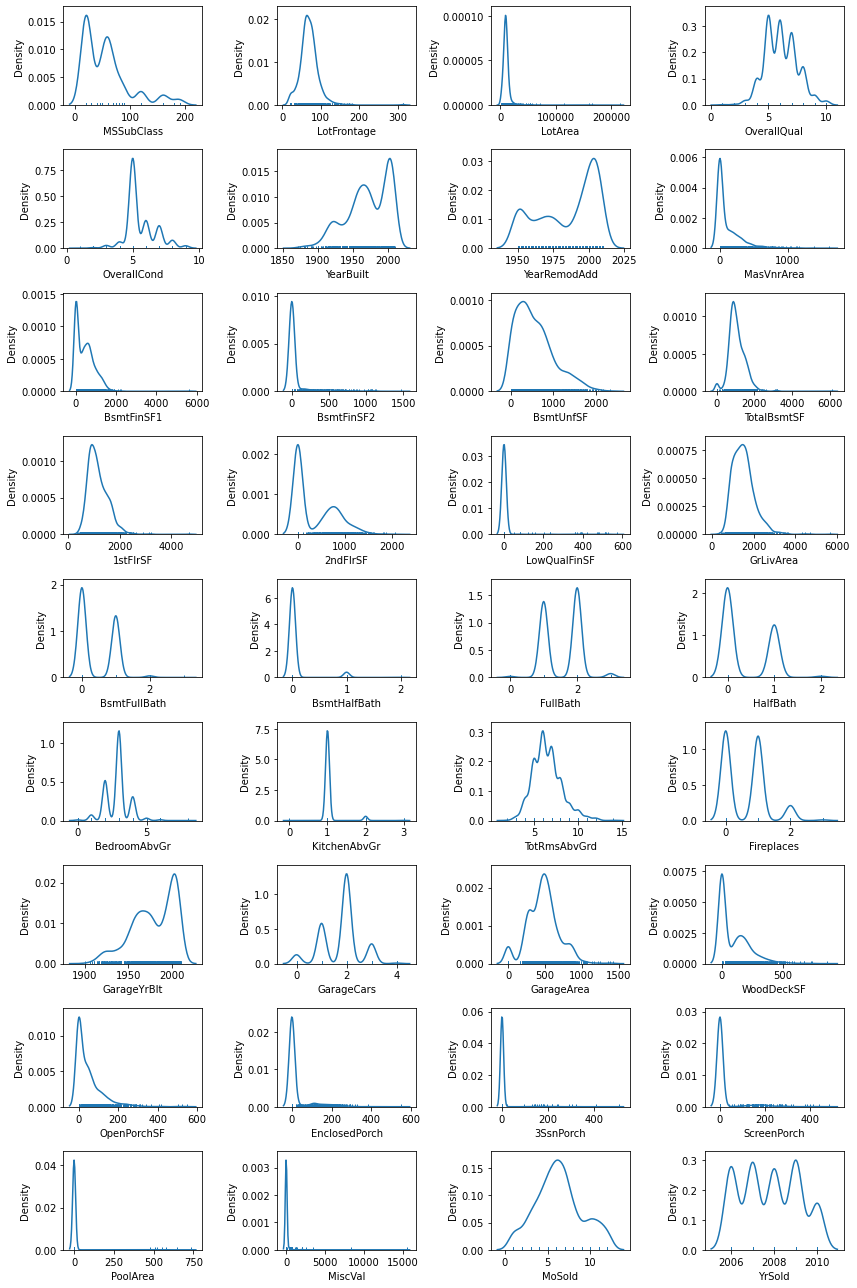

In [20]:
# Print num of variables to make sure we didn't mess up in the last step
print(len(num_attributes.columns))

fig = plt.figure(figsize = (12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])
    
plt.tight_layout()
plt.show()
    

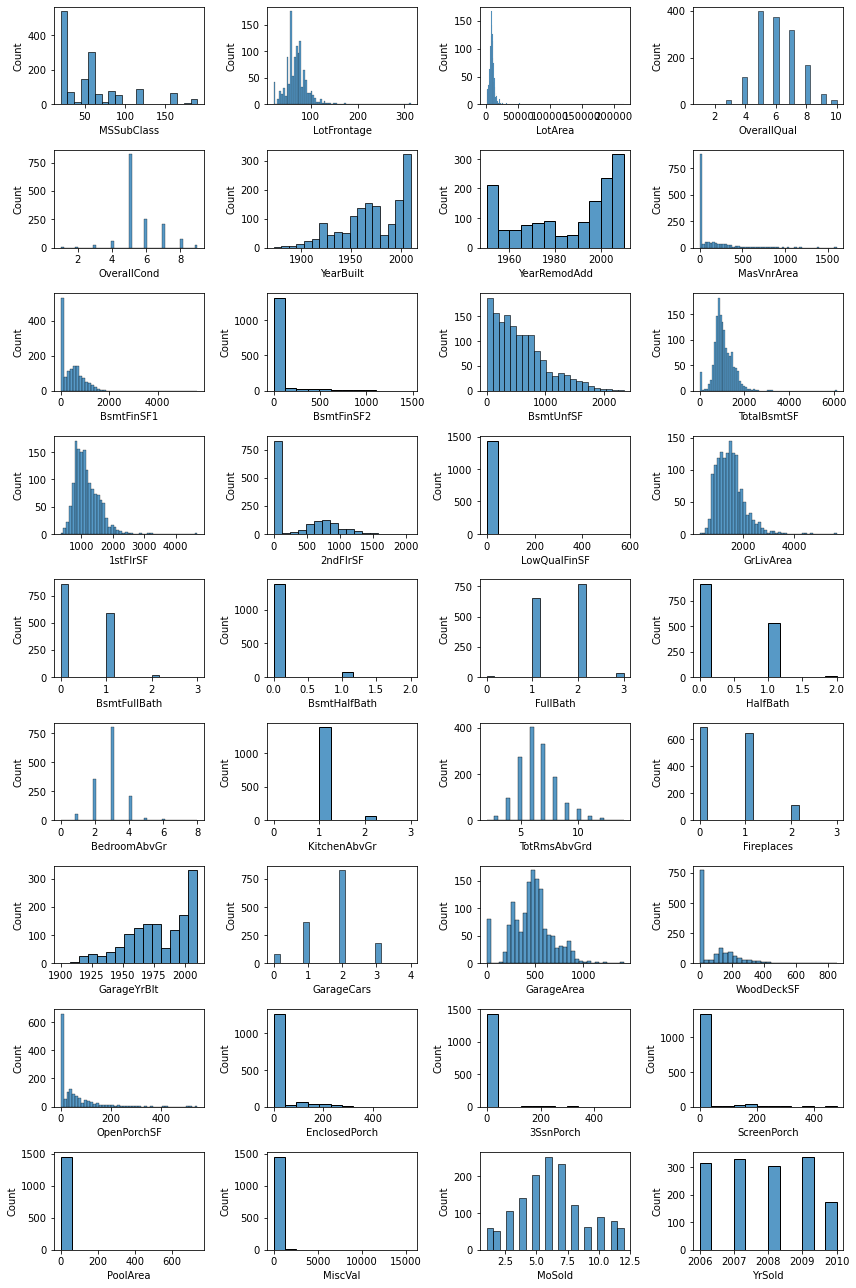

In [21]:
fig = plt.figure(figsize = (12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])
    
plt.tight_layout()
plt.show()

# Looking for Outliers

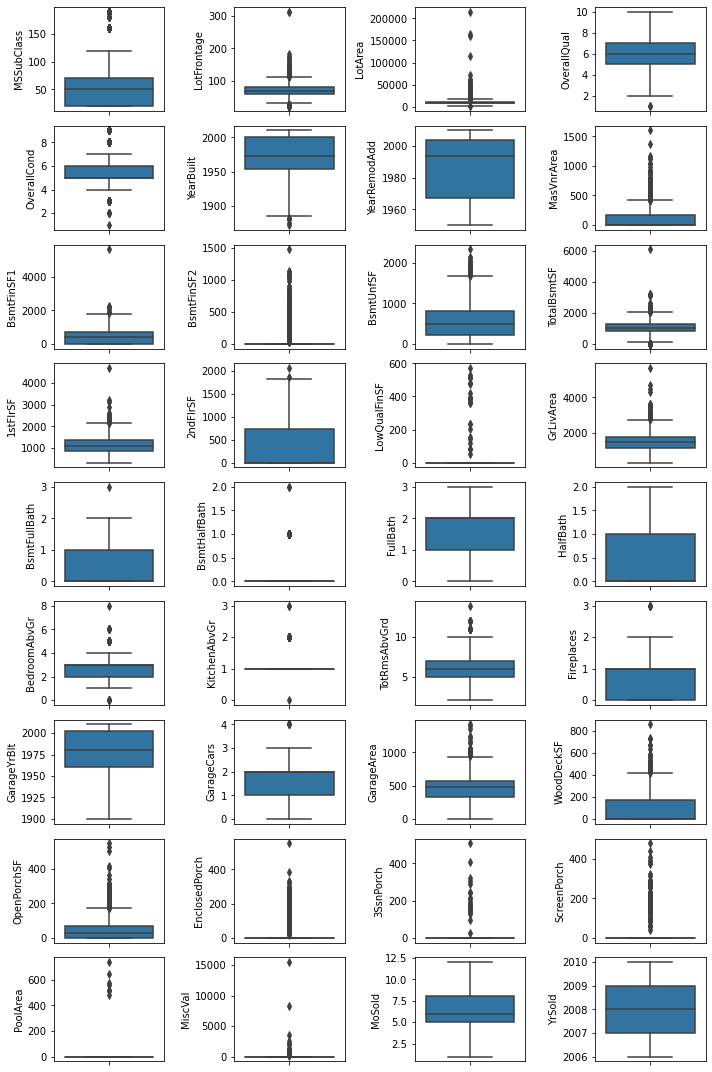

In [22]:
fig = plt.figure(figsize = (10,15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4, i+1)
    sns.boxplot(y = num_attributes.iloc[:,i])
    
plt.tight_layout()
plt.show()


# Correlations Among Numerical Attributes

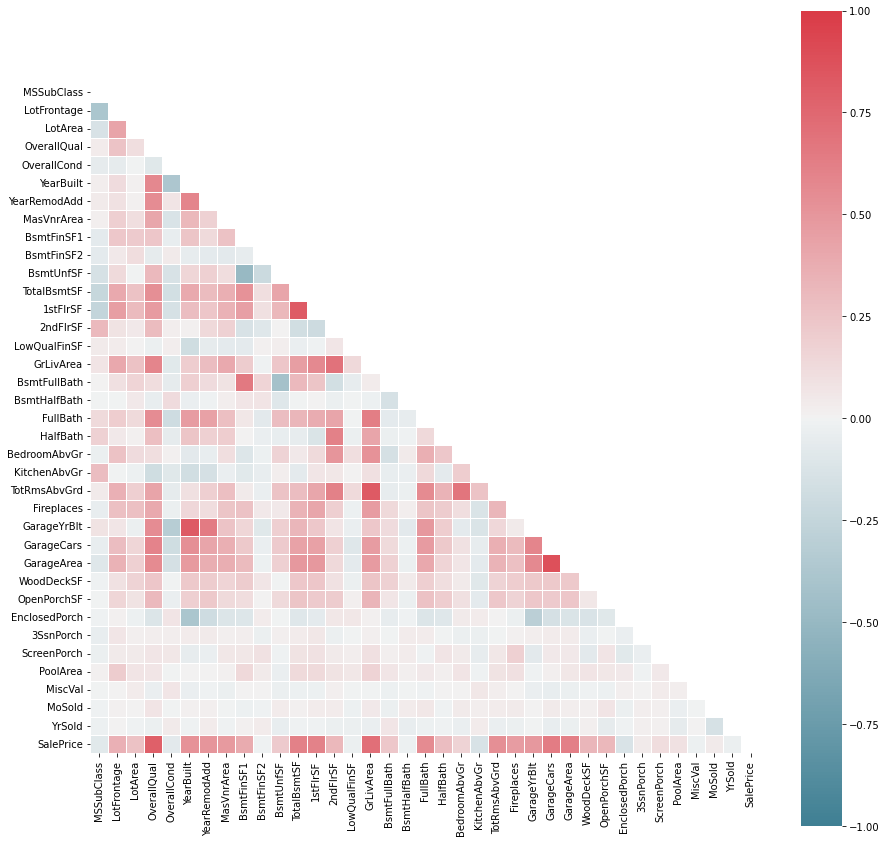

In [23]:
# Correlation of numerical attributes

corr = housing.corr()

# Using mask to get triangular correlation matrix

f, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, 
            cmap = sns.diverging_palette(220,10,as_cmap = True),
           square = True, ax =ax, vmin = -1.0, vmax = 1.0, 
           linewidths = .5);

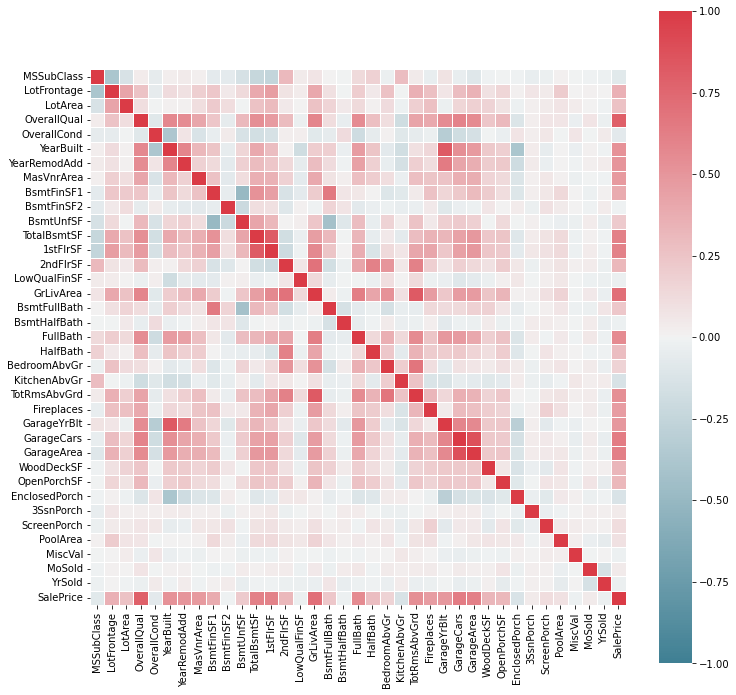

In [24]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr,
            cmap = sns.diverging_palette(220,10,as_cmap = True),
           square = True, ax =ax, vmin = -1.0, vmax = 1.0, 
           linewidths = .5);

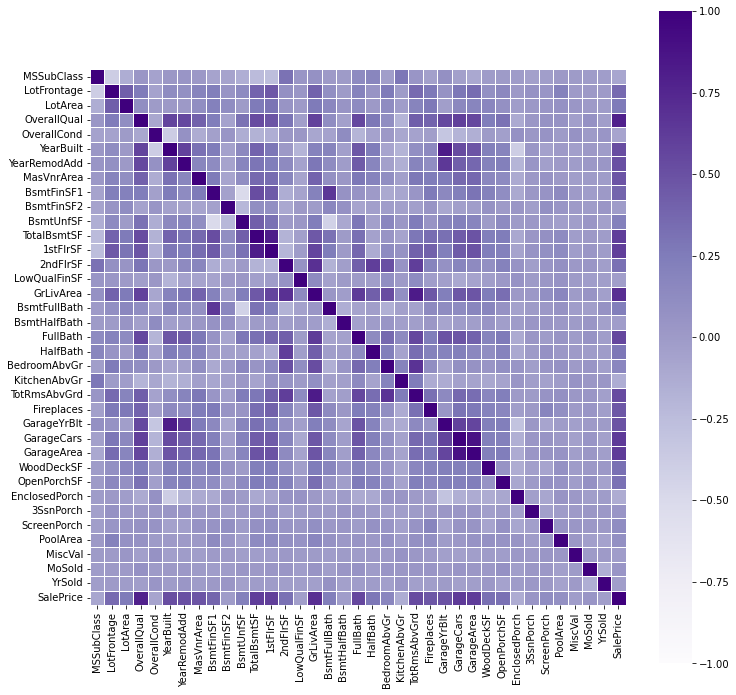

In [25]:
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, square = True, ax = ax, linewidths = .7, cmap = 'Purples');

In [26]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**Pair-wise scatter matrix**

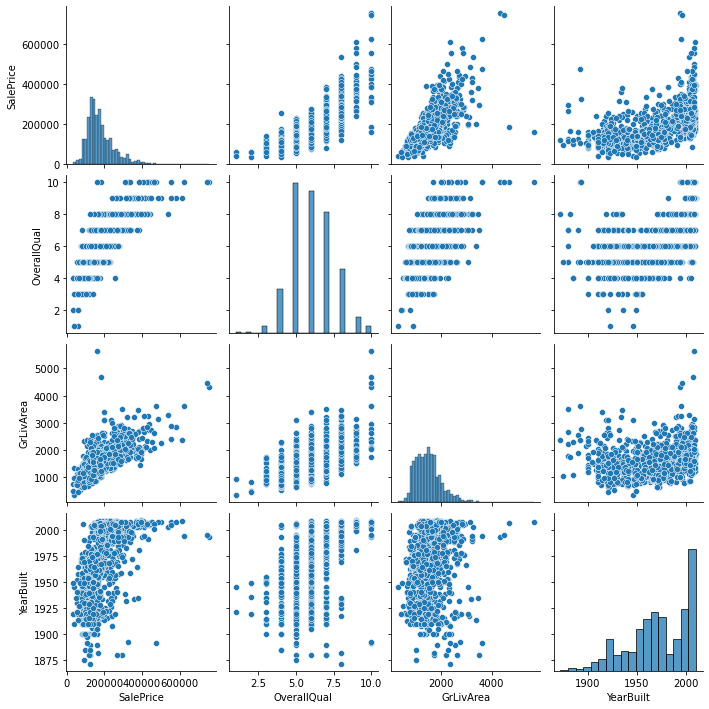

In [27]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])
sns.despine()

**quality and price** (higher quality -> higher price and higher quality -> much higher variability in prices)

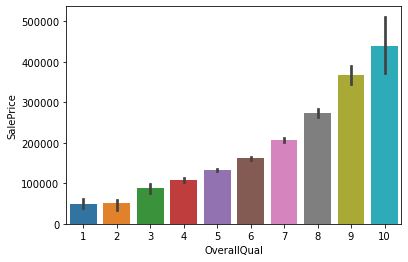

In [28]:
sns.barplot(x = housing.OverallQual, y = housing.SalePrice);

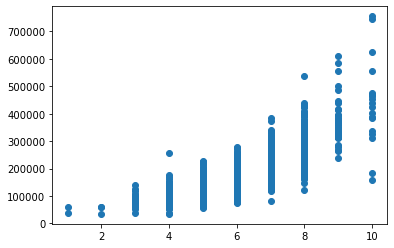

In [29]:
# OverallQual and SalePrice - relationship
plt.scatter(x = housing['OverallQual'], y = housing['SalePrice']);


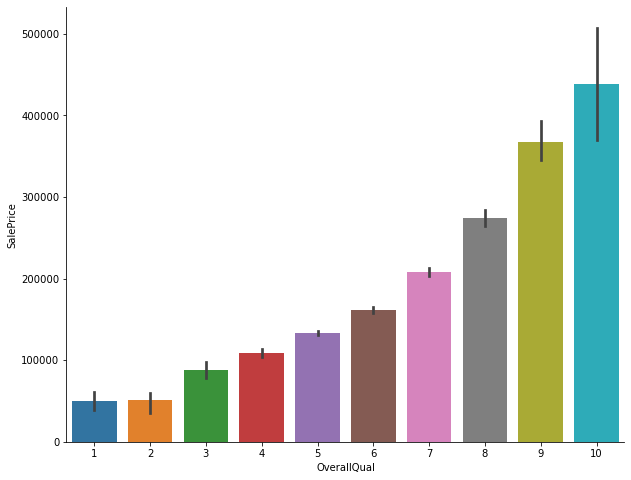

In [30]:
# Barplot
plt.figure(figsize = (10,8))
sns.barplot(x = housing['OverallQual'],y =  housing['SalePrice'])
sns.despine()


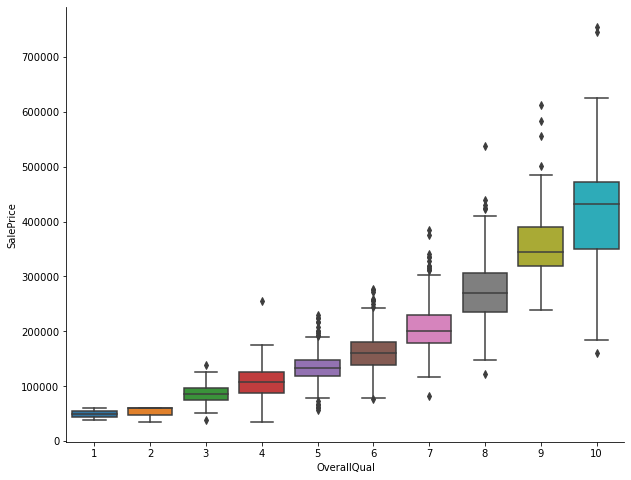

In [31]:
# Boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x = housing['OverallQual'],y= housing['SalePrice'])
sns.despine()

**age of house and price**

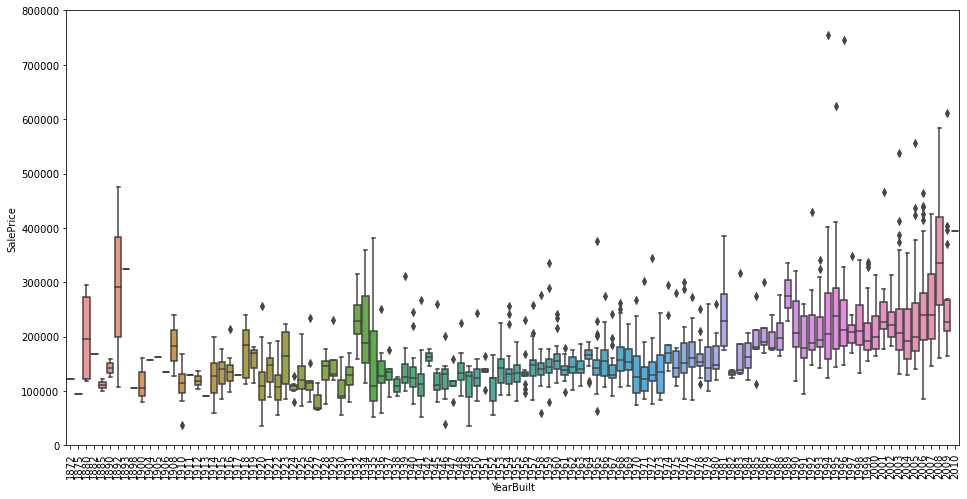

In [32]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax = 800000);
plt.xticks(rotation =90);

In [33]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]).unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs   

,attribute pair,correlation
37,"(GarageArea, GarageCars)",0.882475
4,"(GarageYrBlt, YearBuilt)",0.825667
27,"(GrLivArea, TotRmsAbvGrd)",0.825489
30,"(1stFlrSF, TotalBsmtSF)",0.819530
21,"(OverallQual, SalePrice)",0.790982
15,"(GrLivArea, SalePrice)",0.708624
12,"(2ndFlrSF, GrLivArea)",0.687501
14,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
31,"(BsmtFinSF1, BsmtFullBath)",0.649212
18,"(GarageYrBlt, YearRemodAdd)",0.642277


## Explore Categorical Attributes

In [34]:
cat_names = housing.select_dtypes(include=['object']).columns

In [35]:
cat_names

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

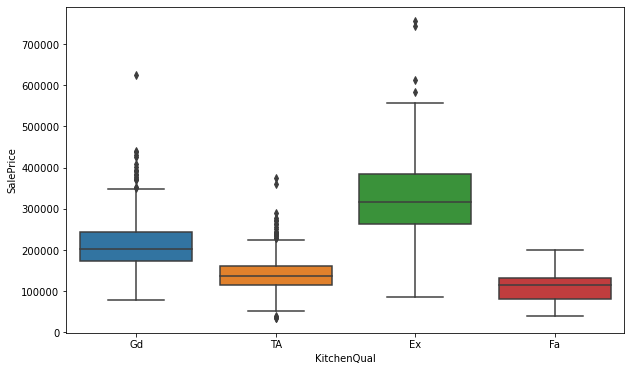

In [36]:
# we want to look at the impact of KitchenQual on price

var = housing['KitchenQual']
f, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = var, y = housing['SalePrice'])
plt.show()

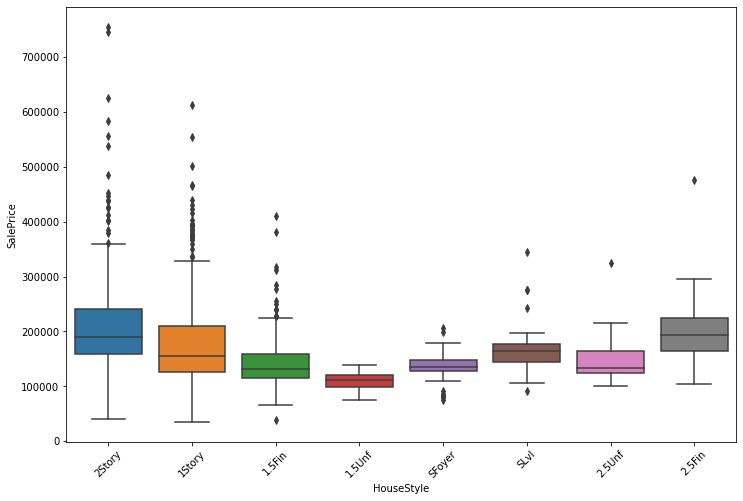

In [37]:
# we want to look at the impact of HouseStyle on price
f, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x =housing['HouseStyle'], y = housing['SalePrice'])
plt.xticks(rotation = 45)
plt.show()

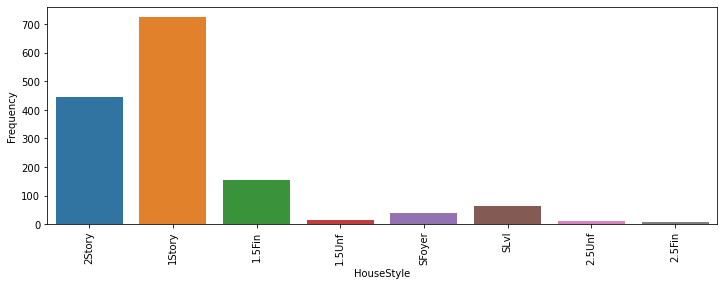

In [38]:
# Count of categories within HouseDtyle attribute

fig  = plt.figure(figsize = (12,4))
sns.countplot(x = 'HouseStyle', data = housing)
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

In [39]:
# The count for each category in HouseStyle
housing['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

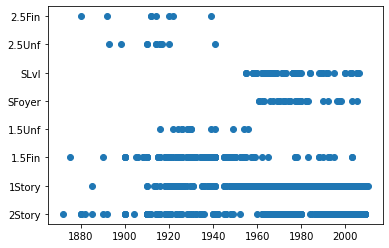

In [40]:
# Has the style of the houses changed over the years?
plt.scatter(housing['YearBuilt'], housing['HouseStyle']);

# 2. Data Preprocessing - Prepare the Data for ML Algorithms

## Deal with Missing Data

In [41]:
# a sorted count of the missing values for all attributes
housing.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [42]:
# Imputing Missing Values

housing_processed = housing

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

# Replace missing values for categorical columns with None

for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")
    
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))

# Garage: GarageYrBlt, GarageArea and GarageCars thesae are numerical columns,
# replace with zero

for col in ['GarageYrBlt', 'GarageArea','GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))
    
# MasVnrArea: replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

# Use the mode value
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

# There is no need of Utilities so let's drop this column
housing_processed = housing_processed.drop(['Utilities'], axis = 1)

In [43]:
# Get the count again to varify that we do not have any more missing values
housing_processed.isnull().apply(sum).max()

0

In [69]:
housing_processed.isnull().sum().max()

0

In [45]:
housing_processed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [46]:
housing_processed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Deal With Outliers

Remove noisy data -> we are going to remove houses where we have some attribute that is above the 0.999 quantile.

In [90]:
num_attributes = housing_processed.select_dtypes(exclude='object')

high_quant = housing_processed.quantile(.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i]>high_quant[i]].index)
    
housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1285 non-null   object 
 1   LotFrontage    1285 non-null   float64
 2   LotArea        1285 non-null   int64  
 3   Street         1285 non-null   object 
 4   Alley          1285 non-null   object 
 5   LotShape       1285 non-null   object 
 6   LandContour    1285 non-null   object 
 7   LotConfig      1285 non-null   object 
 8   LandSlope      1285 non-null   object 
 9   Neighborhood   1285 non-null   object 
 10  Condition1     1285 non-null   object 
 11  Condition2     1285 non-null   object 
 12  BldgType       1285 non-null   object 
 13  HouseStyle     1285 non-null   object 
 14  OverallQual    1285 non-null   int64  
 15  OverallCond    1285 non-null   int64  
 16  YearBuilt      1285 non-null   int64  
 17  YearRemodAdd   1285 non-null   int64  
 18  RoofStyl

In [48]:
high_quant

MSSubClass          190.000
LotFrontage         252.871
LotArea          162062.060
OverallQual          10.000
OverallCond           9.000
YearBuilt          2009.000
YearRemodAdd       2010.000
MasVnrArea         1282.528
BsmtFinSF1         2226.952
BsmtFinSF2         1123.787
BsmtUnfSF          2138.312
TotalBsmtSF        3203.246
1stFlrSF           3186.690
2ndFlrSF           1847.214
LowQualFinSF        522.033
GrLivArea          4584.200
BsmtFullBath          2.000
BsmtHalfBath          1.541
FullBath              3.000
HalfBath              2.000
BedroomAbvGr          6.000
KitchenAbvGr          2.541
TotRmsAbvGrd         12.000
Fireplaces            3.000
GarageYrBlt        2010.000
GarageCars            4.000
GarageArea         1374.394
WoodDeckSF          732.328
OpenPorchSF         513.361
EnclosedPorch       360.296
3SsnPorch           367.067
ScreenPorch         426.230
PoolArea            614.952
MiscVal            6096.800
MoSold               12.000
YrSold             2

## Deal With Correlated Attributes

In [49]:
# Remove highly correlated features
# Remove attributes that were identified for excluding when viewing scatter plots and corr values

attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis = 1)

## Handle Text And Categorical Attributes

Most Machine Learning algorithms need numbers as input, so let's convert all the categories from text to numbers.

To dela with textual data -> create one binary attribute for each category of the feature

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot

<1422x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 99540 stored elements in Compressed Sparse Row format>

In [123]:
#print(housing_processed_1hot)

In [124]:
#housing_processed_1hot.toarray()

In [125]:
#cat_encoder.categories_

## Feature Scaling

* Normalizaton (min-max scaling)    
    $ X_{sc} = \frac{x - x_{min}}{x_{max} - x_{min}} $
* Standardization     
    $ Z = \frac{x - \mu}{\sigma}$

# 3. Data Transformation

 ## Transformation Pipelines

Numerical pipeline:

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [100]:
# Seperate features and target variable
housing_X = housing_processed.drop('SalePrice', axis = 1)
housing_y = housing_processed['SalePrice'].copy()

In [103]:
# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude = ['object'])
cat_attributes = housing_X.select_dtypes(include = 'object')  # ['object'] or 'object'

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

In [107]:
print(num_attribs),

print('\n',cat_attribs)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [108]:
# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline  = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])

In [109]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
    
])

In [111]:
# Desccribe before applying transforms
print(housing_y.describe())

count      1285.000000
mean     169154.657588
std       61650.248307
min       35311.000000
25%      127500.000000
50%      156000.000000
75%      200000.000000
max      412500.000000
Name: SalePrice, dtype: float64


In [112]:
# apply log-transform to SalePrice
housing_y_prepared = np.log(housing_y)

In [116]:
housing_y_prepared.describe()

count    1285.000000
mean       11.974850
std         0.359684
min        10.471950
25%        11.755872
50%        11.957611
75%        12.206073
max        12.929991
Name: SalePrice, dtype: float64

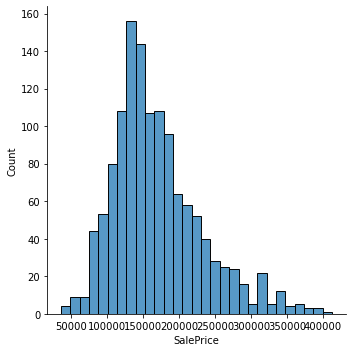

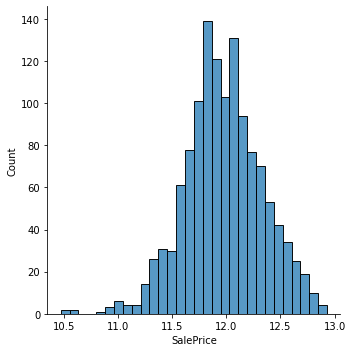

In [114]:
sns.displot(housing_y); sns.displot(housing_y_prepared);

In [117]:
# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

In [119]:
housing_X_prepared

<1285x275 sparse matrix of type '<class 'numpy.float64'>'
	with 87380 stored elements in Compressed Sparse Row format>

In [122]:
#print(housing_X_prepared)

# 4. Machine Learning Models

## Train and Evaluate Multiple Models on the Training Set

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, 
                                                    test_size = 0.2, random_state = 7)

In [129]:
from sklearn.metrics import mean_squared_error

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

#from xgboost import XGBRegressor
#import xgboost

In [135]:
# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

In [137]:
# Series to collect RMSE for the different algorithms: 'algorithm name + rmse'
rmse_compare = pd.Series(dtype = 'float64')
rmse_compare.index.name = 'Model'

In [141]:
# Series to collect accuracy scores for the different algorithms: 'algorithm name + score'
scores_compare = pd.Series(dtype = 'float64')
scores_compare.index.name = 'Model'

In [142]:
# Model 1. Liner Regression ========================================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test) * 100
scores_compare['LinearRegression'] = lr_score

In [155]:
# Model 2. Decision Trees =========================================================================
dtree_model = DecisionTreeRegressor(random_state = 5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test) * 100
scores_compare['DecisionTree'] = dtree_score

In [156]:
# Model 3. Random Forest ========================================================================
rf_model = RandomForestRegressor(random_state = 5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test) * 100
scores_compare['RadnomForest'] = rf_score

In [157]:
# Model 4. Gradient Boosting Regression ==========================================================
gbr_model = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.05,
                                      max_depth = 4, random_state = 5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test) * 100
scores_compare['GradientBoosting'] = gbr_score

**Comparative analysis of models and their errors**

In [160]:
print('RMSE values for different algotithms: ')
rmse_compare.sort_values(ascending = True).round()

RMSE values for different algotithms: 


Model
LinearRegression    21641.0
GradientBoosting    22238.0
RandomForest        24159.0
DecisionTree        35052.0
dtype: float64

In [154]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
GradientBoosting    89.827
LinearRegression    88.070
RadnomForest        86.599
DecisionTree        72.225
dtype: float64

**Evaluate Using Cross- Validation**

In [159]:
from sklearn.model_selection import cross_val_score

In [161]:
# Perform K fold cross-validation shere K = 10
# Linear Regression
scores = cross_val_score(linear_model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
linear_rmse_scores = np.sqrt(-scores)

In [163]:
# Display results
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
    
display_scores(linear_rmse_scores)

Scores:  [0.1271871  0.12439479 0.1034144  0.11145078 0.13814702 0.11874004
 0.09606593 0.13627224 0.13205165 0.14024085]
Mean:  0.1227964812433823
Standard deviation:  0.014368015027625806


In [165]:
# Gradient Boosting Regression
scores = cross_val_score(gbr_model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
gbr_rmse_scores = np.sqrt(-scores)

display_scores(gbr_rmse_scores)

Scores:  [0.11562902 0.09805318 0.09622083 0.11653355 0.14801374 0.11354183
 0.09246889 0.13395791 0.10115313 0.1510799 ]
Mean:  0.11666519906779056
Standard deviation:  0.020167925046603585


# 5. Fine - Tune Parameters

## Grid Search

In [170]:
from sklearn.model_selection import GridSearchCV

# Define the parameters for exploration
param_grid = [
    {'n_estimators' : [10, 50, 100, 150], 'max_features' : [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap' : [False], 'n_estimators' : [10,50,100,150], 'max_features' : [10, 20, 30, 40, 50, 100, 150]},
]

# The model for which we are finding params values - Random Forest
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 20, 30, 40, 50, 100, 150],
                          'n_estimators': [10, 50, 100, 150]},
                         {'bootstrap': [False],
                          'max_features': [10, 20, 30, 40, 50, 100, 150],
                          'n_estimators': [10, 50, 100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
# Best values
grid_search.best_params_

{'bootstrap': False, 'max_features': 50, 'n_estimators': 150}

In [173]:
# Model with best values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=50, n_estimators=150)

## Evaluate Using the Fine-Tuned Model

In [175]:
rf_model_final = RandomForestRegressor(bootstrap = False, max_features = 50, 
                                       n_estimators = 150, random_state = 5)
rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_test)

# Get RMSE
rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_test))
np.sqrt(rf_final_val_rmse)



22910.40951884375

In [176]:
# Get Accuracy
rf_model_final.score(X_test, y_test) * 100

88.22352776456555

Our accuracy has gone up from about 88.6 to 88.2 while the RMSE has decreased from 24159 to 22910. This is a significant improvement!
In this example we obtained a much better solution by setting the max_features hyperparameter to 50 and the n_estimators hyperparameter to 150. 
Notice that LinearRegression is still performing better so we are going to choose it as our fianl model.

